In [1]:
%load_ext autoreload
%autoreload 2
import os

import numpy as np

In [2]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
from src.data.shapenet import ShapeNet

{'02691156': 'airplane', '02933112': 'cabinet', '02958343': 'car', '03001627': 'chair', '03636649': 'lamp', '04256520': 'sofa', '04379243': 'table', '04530566': 'watercraft'}


In [3]:
ShapeNet.class_name_mapping

{'02691156': 'airplane',
 '02933112': 'cabinet',
 '02958343': 'car',
 '03001627': 'chair',
 '03636649': 'lamp',
 '04256520': 'sofa',
 '04379243': 'table',
 '04530566': 'watercraft'}

In [124]:
dataset = ShapeNet('overfit','02691156' )

(1, 1)


In [125]:
data = dataset[0]

1
torch.Size([3, 224, 224])


In [6]:
import open3d as o3d
import torch
pcd = o3d.geometry.PointCloud()

data_pcl = torch.reshape(data['pcl'], ( 1024, 3)).numpy()
print(data_pcl.shape)

pcd.points = o3d.utility.Vector3dVector(data_pcl)
o3d.io.write_point_cloud("./data.ply", pcd)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
(1024, 3)


True

In [126]:
data['name']

'5413e0eca808b2601f17e8416b3322a8'

In [6]:
import matplotlib.pyplot as plt

torch.Size([3, 224, 224])


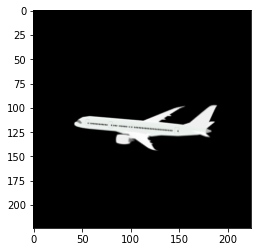

In [127]:
tensor_image = data['img_rgb']
print(tensor_image.shape)
plt.imshow(  tensor_image.permute(1, 2, 0)  )

torch.Size([3, 224, 224])


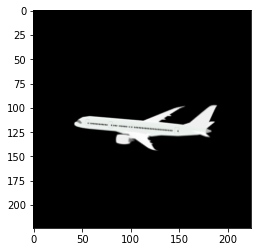

In [128]:
tensor_image = data['img_rgb'][:3,...]
print(tensor_image.shape)
plt.imshow(  tensor_image.permute(1, 2, 0)  )


torch.Size([1, 224, 224])


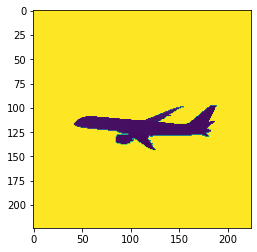

In [129]:
tensor_image = data['img_mask']
print(tensor_image.shape)
plt.imshow(  tensor_image.permute(1, 2, 0)  )

In [12]:
data['pcl'].shape

torch.Size([3, 1024])

In [14]:
%pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [7]:
from src.network_architecture.recon_model import ReconstructionNet
from torchsummary import summary

cnn3d = ReconstructionNet().cuda()
print(summary(cnn3d, input_size=(3,224,224))) 


torch.Size([2, 256, 14, 14])
torch.Size([2, 50176])
before view:  torch.Size([2, 3072])
after view:  torch.Size([2, 3, 1024])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             896
              ReLU-2         [-1, 32, 112, 112]               0
            Conv2d-3           [-1, 64, 56, 56]          18,496
              ReLU-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 128, 28, 28]          73,856
              ReLU-6          [-1, 128, 28, 28]               0
            Conv2d-7          [-1, 256, 14, 14]         295,168
              ReLU-8          [-1, 256, 14, 14]               0
            Linear-9                  [-1, 128]       6,422,656
             ReLU-10                  [-1, 128]               0
           Linear-11                  [-1, 128]          16,512
             ReLU-12                  [-1

In [16]:
torch.device("cuda")

device(type='cuda')

In [131]:
from src.training import train_recon
config = {
     'category' :  '02691156',
    'experiment_name': 'recon_overfitting',
    'device': 'cuda',                      # change this to cpu if you do not have a GPU
    'is_overfit': True,                      # True since we're doing overfitting
    'batch_size': 2,
    'resume_ckpt': None,
    'learning_rate': 0.0005,
    'max_epochs': 60,
    'print_every_n': 1,
    'validate_every_n': 1,
}

train_recon.train(config)  # should be able to get ~0 loss, 100% accuracy

(1, 1)
(1, 1)
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[000/00000] val_loss: 0.015
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[001/00000] val_loss: 0.014
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 

torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[023/00000] val_loss: 0.004
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[024/00000] val_loss: 0.004
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[025/00000] val_loss: 0.003
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size

torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[047/00000] val_loss: 0.000
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
[048/00000] val_loss: 0.000
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
prediction shape:  torch.Size([1, 3, 1024])
torch.Size([1, 3, 224, 224])
torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after v

train_loss,███▇▇▇▇▆▆▆▅▅▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,██▇▇▇▇▆▆▆▅▅▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,8e-05
val_loss,7e-05


In [132]:
model = ReconstructionNet().cuda()
ckpt = f'src/runs/{config["experiment_name"]}/model_best.ckpt'
model.load_state_dict(torch.load(ckpt, map_location='cpu'))
model.eval()

ReconstructionNet(
  (relu): ReLU()
  (cnn1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (cnn2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (cnn3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (cnn4): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=50176, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=3072, bias=True)
)

In [21]:
summary(model, (3,224,224))

torch.Size([2, 256, 14, 14])
torch.Size([2, 50176])
before view:  torch.Size([2, 3072])
after view:  torch.Size([2, 3, 1024])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             896
              ReLU-2         [-1, 32, 112, 112]               0
            Conv2d-3           [-1, 64, 56, 56]          18,496
              ReLU-4           [-1, 64, 56, 56]               0
            Conv2d-5          [-1, 128, 28, 28]          73,856
              ReLU-6          [-1, 128, 28, 28]               0
            Conv2d-7          [-1, 256, 14, 14]         295,168
              ReLU-8          [-1, 256, 14, 14]               0
            Linear-9                  [-1, 128]       6,422,656
             ReLU-10                  [-1, 128]               0
           Linear-11                  [-1, 128]          16,512
             ReLU-12                  [-1

In [22]:
import torchvision.transforms as transforms
import cv2
from os.path import join, abspath, basename

In [133]:
rendered_path = "src/data/ShapeNet_rendered"  
transform = transforms.Compose([
            transforms.ToTensor()
        ])


img_path = join(rendered_path , config['category']+'/5413e0eca808b2601f17e8416b3322a8/render_0.png')
rgb_image =  cv2.imread(img_path)

In [134]:
input_tensor = transform(rgb_image)
print(input_tensor.shape)

torch.Size([3, 224, 224])


In [135]:
prediction = model(torch.unsqueeze(data['img_rgb'].cuda(), 0))
print(prediction.shape)

torch.Size([1, 256, 14, 14])
torch.Size([1, 50176])
before view:  torch.Size([1, 3072])
after view:  torch.Size([1, 3, 1024])
torch.Size([1, 3, 1024])


In [136]:
import open3d as o3d
import torch
pcd = o3d.geometry.PointCloud()

data_pcl = torch.reshape(prediction, ( 1024, 3)).cpu().detach().numpy()
print(data_pcl.shape)

pcd.points = o3d.utility.Vector3dVector(data_pcl)
o3d.io.write_point_cloud("./data_3.ply", pcd)

(1024, 3)


True

In [119]:
items = np.load('src/data/splits/shapenet/images_list_02691156_train.npy', allow_pickle=True)

In [123]:
items[3:4].dump('src/data/splits/shapenet/images_list_02691156_overfit.npy')

In [ ]:
%pip install wandb

In [157]:
from src.network_architecture.pose_net import PoseNet

posenet = PoseNet().cuda()
predicted_pose =  posenet(torch.unsqueeze(data['img_rgb'].cuda(), 0))
print(predicted_pose)

tensor([[-0.2136, -0.3784]], device='cuda:0', grad_fn=<ViewBackward0>)


## Applying projection to output from recon_net

In [18]:
from src.renderer.projection import World2Cam, PerspectiveTransform, RgbContProj, ContProj

In [19]:
world2cam = World2Cam()
perspective_transform = PerspectiveTransform()
get_proj_rgb = RgbContProj()
get_proj_mask = ContProj()

In [20]:
def plot_img_and_mask(pcl, pose_out):
    pcl_out_rot = world2cam(pcl, pose_out[:, 0], pose_out[:, 1], 2., 2., 1,device="cuda")
    pcl_out_pers = perspective_transform(pcl_out_rot, 1, device="cuda")
    img_out = get_proj_rgb(pcl_out_pers, pcl, 1024, 60, 60, device="cuda")
    mask_out = get_proj_mask(pcl_out_pers, 60, 60, 1024, 0.4, device="cuda")
    
    img = img_out[0][0].cpu().detach().numpy()
    mask = mask_out[0].cpu().detach().numpy()
    
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img)
    axs[1].imshow(mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1024, 60, 60, 1])
torch.Size([1, 1024, 1, 1, 3])


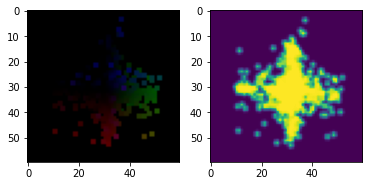

In [158]:
# This should come from posenet
#pose_out = torch.from_numpy(np.reshape(np.pi*np.array((0.3, 0.5)), (-1,2)))
plot_img_and_mask(prediction, predicted_pose)

# Check if renderer works with batch data

In [4]:
dataset = ShapeNet('train','02691156' )

(2831, 1)


In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [50]:
train_features = next(iter(train_dataloader))

4
torch.Size([3, 224, 224])
3
torch.Size([3, 224, 224])
7
torch.Size([3, 224, 224])
0
torch.Size([3, 224, 224])


In [65]:
from src.network_architecture.recon_model import ReconstructionNet
from src.network_architecture.pose_net import PoseNet

recon_net = ReconstructionNet().cuda()
dummy_predictions_pcl = recon_net(train_features['img_rgb'].cuda())

pose_net = PoseNet().cuda()
dummy_prediction_pose = pose_net(train_features['img_rgb'].cuda())

torch.Size([4, 256, 14, 14])
torch.Size([4, 50176])
before view:  torch.Size([4, 3072])
after view:  torch.Size([4, 3, 1024])


In [17]:
print(dummy_predictions_pcl.shape)
print(dummy_prediction_pose.shape)

torch.Size([4, 3, 1024])
torch.Size([4, 2])


In [63]:
def plot_img_and_mask_batch(pcl, pose_out, rgb, batch_size = 4):
    pcl_out_rot = world2cam(pcl, pose_out[:, 0], pose_out[:, 1], 2., 2., 1,device="cuda")
    pcl_out_pers = perspective_transform(pcl_out_rot, 1, device="cuda")
    img_out = get_proj_rgb(pcl_out_pers, pcl, 1024, 60, 60, device="cuda")
    mask_out = get_proj_mask(pcl_out_pers, 60, 60, 1024, 0.4, device="cuda")
    
    fig, axs = plt.subplots(batch_size, 3, figsize=(20,20))
    for i in range(batch_size):
        axs[i,0].imshow(img_out[0][i].cpu().detach().numpy())
        axs[i,1].imshow(mask_out[i].cpu().detach().numpy())
        axs[i,2].imshow(rgb[i].permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 1024, 60, 60, 1])
torch.Size([4, 1024, 1, 1, 3])


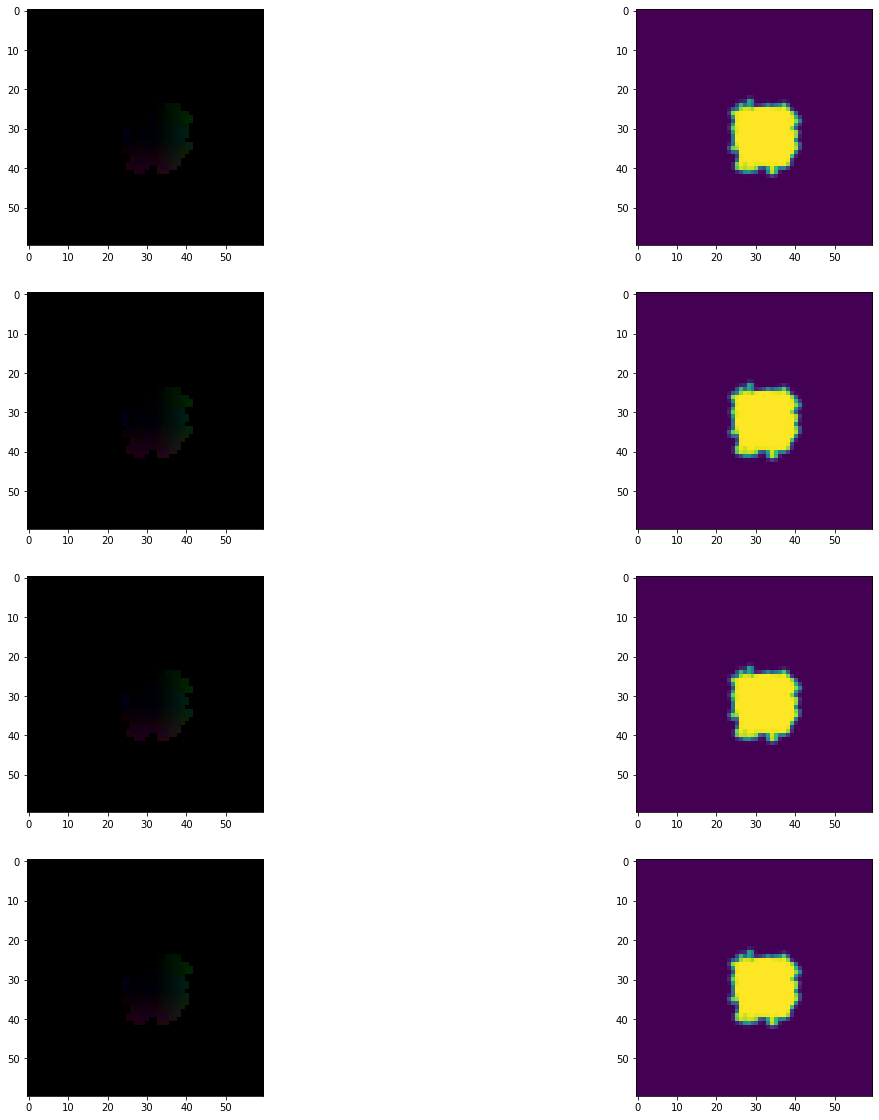

In [34]:
plot_img_and_mask_batch(dummy_predictions_pcl, dummy_prediction_pose, train_features["img_rgb"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([4, 1024, 60, 60, 1])
torch.Size([4, 1024, 1, 1, 3])


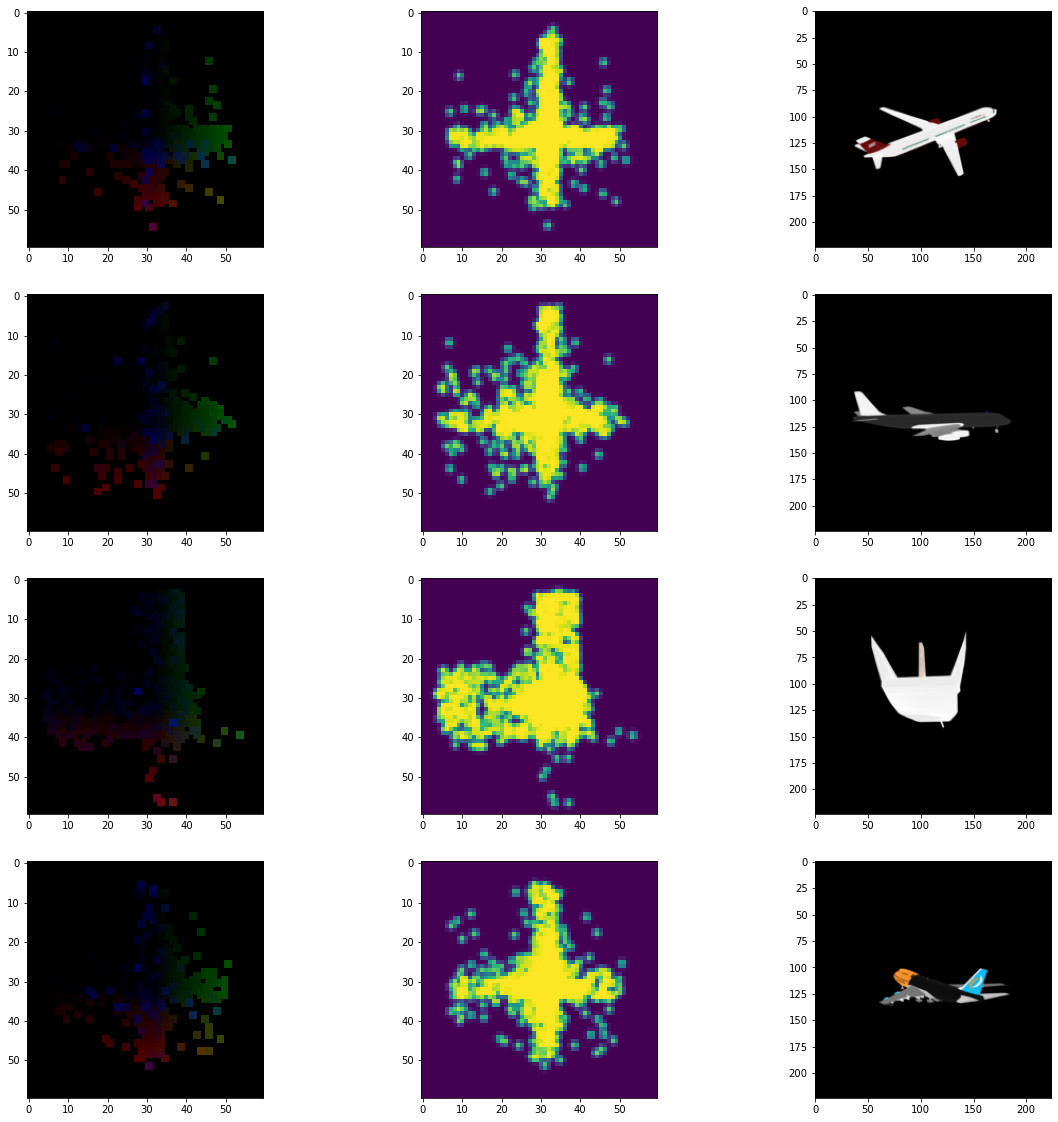

In [66]:
# Replace dummy_prediction_pose with actual point clouds so that we don't get blobs
actual_data = train_features['pcl'].cuda()
plot_img_and_mask_batch(actual_data, dummy_prediction_pose, train_features["img_rgb"])